# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#threeone>3.1. Overview </a>

<a href=#threetwo>3.2. Basic Analysis </a>

<a href=#threethree>3.3. Univariate Analysis:  Non-graphical </a>

<a href=#threefive>3.3. Univariate Analysis: Graphical </a>

<a href=#threefour>3.4. Multivariate Analysis: Non-Graphical </a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import statistics
from numpy import set_printoptions
import datetime
from dateutil.parser import parse
from datetime import datetime
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rc
%config InlineBackend.figure_format = 'retina' # Plotting Pretty figures and avoiding blurry images
sns.set_context('notebook') # Larger scale for plots in notebooks
## from skimpy import skim

# Plotting Pretty figures and avoiding blurry images
%config InlineBackend.figure_format = 'retina'

# Larger scale for plots in notebooks
sns.set_context('notebook')

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn import preprocessing

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
## from wordcloud import WordCloud

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')
# expand all the columns 
pd.set_option('display.max_columns', 500) 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


<a id="threeone"></a>

### Overview
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

This would be done in the following format:

- Basic Analysis Jump to link here
- Univariate Non Graphical Analysis Jump to link here
- Univariate Graphical Analysis Jump to link here
- Multivriate Non Graphical Analysis Jump to link here
- Multivariate Graphical Analysis Jump to link here

<div align="left" style="width: 600px; text-align: left;">
<img src="https://github.com/Explore-AI/Pictures/blob/f860f39251c523eda779dea0140316ccbefdd8e0/eda_map.jpg?raw=True"
     alt="EDA Diagram"
     style="padding-bottom=0.5em"
     width=600px/>
</div>

<a id="threetwo"></a>
### Basic Analysis 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
# Check the first five rows of the dataset
df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                0.0           1.000000                 0.0       223.333333   
1                0.0           1.000000                 0.0       221.000000   
2                0.0           1.000000                 0.0       214.333333   
3                0.0           1.000000                 0.0       199.666667   
4                2.0           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   
2            2.666667                0.0             sp25              0.0   
3            4.000000                0.0             sp25              0.0   
4            3.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4                NaN        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0   

Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

- 'time'
- 'Madrid_wind_speed'
- 'Valencia_wind_deg'
- 'Bilbao_rain_1h' 
- 'Valencia_wind_speed'
- 'Seville_humidity'
- 'Madrid_humidity' 
- 'Bilbao_clouds_all'
- 'Bilbao_wind_speed',
- 'Seville_clouds_all' 
- 'Bilbao_wind_deg' 
- 'Barcelona_wind_speed'
- 'Barcelona_wind_deg'
- 'Madrid_clouds_all'
- 'Seville_wind_speed'
- 'Barcelona_rain_1h'
- 'Seville_pressure'
- 'Seville_rain_1h'
- 'Bilbao_snow_3h'
- 'Barcelona_pressure'
- 'Seville_rain_3h'
- 'Madrid_rain_1h'
- 'Barcelona_rain_3h'
- 'Valencia_snow_3h',
- 'Madrid_weather_id'
- 'Barcelona_weather_id'
- 'Bilbao_pressure',
- 'Seville_weather_id'
- 'Valencia_pressure'
- 'Seville_temp_max'
- 'Madrid_pressure'
- 'Valencia_temp_max'
- 'Valencia_temp',
- 'Bilbao_weather_id'
- 'Seville_temp'
- 'Valencia_humidity' 
- 'Valencia_temp_min'
- 'Barcelona_temp_max'
- 'Madrid_temp_max',
- 'Barcelona_temp'
- 'Bilbao_temp_min'
- 'Bilbao_temp',
- 'Barcelona_temp_min'
- 'Bilbao_temp_max' 
- 'Seville_temp_min'
- 'Madrid_temp'
- 'Madrid_temp_min'
- 'load_shortfall_3h'
      


<div class="alert alert-block alert-info">
<b>Note:</b> Opps! There is the `Unnamed : 0` Column which serves as index, we don't need this, we will delete it immediately..
</div>

In [4]:
# Delete the Unnamed: 0 column
del df['Unnamed: 0']

In [5]:
# Check the shape of the dataset
df.shape

(8763, 48)

The shape command shows us that we have 8763 rows of data and 48 features.

In [6]:
# print a concise summary of a DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

The concise summary of the data shows the feature in our dataframe, also the number of columns that are not empty, our data types.

- The result shows me have no null values, this would be further explored to confirm in details.
- We have 45 of the columns to be of float values and 3 in object (string)
    - Time, Valencia_wind_deg, Seville_pressure are in object, they would need to be converted to numericals because Regression Models cannot doesn't take non-numerical figures.
- The dataset runs on 3.2+ mb of the system memory.

In [7]:
# Check for missing values in individual columns

df.isna().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

The `Valencia_pressure` has missing records of 2068, this is quite large, let's check the percentage composition of this.

In [8]:
# Let's check the percentage composition of this
# Calculate the percentage of missing value
valueList = list()
colList= list()
for col in df.columns:
    percentageMissing = np.mean(df[col].isnull()) * 100
    colList.append(col)
    valueList.append(percentageMissing)
percentageMissingDf = pd.DataFrame()
percentageMissingDf['col'] = colList
percentageMissingDf['percentageMissing'] = valueList
percentageMissingDf

col  percentageMissing
0                   time           0.000000
1      Madrid_wind_speed           0.000000
2      Valencia_wind_deg           0.000000
3         Bilbao_rain_1h           0.000000
4    Valencia_wind_speed           0.000000
5       Seville_humidity           0.000000
6        Madrid_humidity           0.000000
7      Bilbao_clouds_all           0.000000
8      Bilbao_wind_speed           0.000000
9     Seville_clouds_all           0.000000
10       Bilbao_wind_deg           0.000000
11  Barcelona_wind_speed           0.000000
12    Barcelona_wind_deg           0.000000
13     Madrid_clouds_all           0.000000
14    Seville_wind_speed           0.000000
15     Barcelona_rain_1h           0.000000
16      Seville_pressure           0.000000
17       Seville_rain_1h           0.000000
18        Bilbao_snow_3h           0.000000
19    Barcelona_pressure           0.000000
20       Seville_rain_3h           0.000000
21        Madrid_rain_1h           0.000000
22     Barcelona_rain_3h           0.000000
23      Valencia_snow_3h           0.000000
24     Madrid_weather_id           0.000000
25  Barcelona_weather_id           0.000000
26       Bilbao_pressure           0.000000
27    Seville_weather_id           0.000000
28     Valencia_pressure          23.599224
29      Seville_temp_max           0.000000
30       Madrid_pressure           0.000000
31     Valencia_temp_max           0.000000
32         Valencia_temp           0.000000
33     Bilbao_weather_id           0.000000
34          Seville_temp           0.000000
35     Valencia_humidity           0.000000
36     Valencia_temp_min           0.000000
37    Barcelona_temp_max           0.000000
38       Madrid_temp_max           0.000000
39        Barcelona_temp           0.000000
40       Bilbao_temp_min           0.000000
41           Bilbao_temp           0.000000
42    Barcelona_temp_min           0.000000
43       Bilbao_temp_max           0.000000
44      Seville_temp_min           0.000000
45           Madrid_temp           0.000000
46       Madrid_temp_min           0.000000
47     load_shortfall_3h           0.000000

<div class="alert alert-block alert-info">
<b>Note:</b> 23.6% of the  data in Valencia_pressure column is missing, this informs us that a large percentage of the data is missing. 
</div>

---

<a id="threethree"></a>

### Univariate Non-graphical 
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

---


This is the simplest form of data analysis as during this we use just one variable to research the information about the data set. The standard goal of univariate non-graphical EDA is to know the underlying sample distribution in the data.

In [9]:
# look at data statistics
df.describe().T

count          mean           std          min  \
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Valencia_pressure     6695.0   1012.051407      9.506214   972.666667   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.300000e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      1.666667      3.666667  5.200000e+01  
Seville_humidity        44.333333     65.666667     82.000000  1.000000e+02  
Madrid_humidity         36.333333     58.000000     78.666667  1.000000e+02  
Bilbao_clouds_all       10.000000     45.000000     75.000000  1.000000e+02  
Bilbao_wind_speed        0.666667      1.000000      2.666667  1.266667e+01  
Seville_clouds_all       0.000000      0

Looking at the summary statistics, we can identify some potential issues, some of them are as follows:

- The range of the data (Max - Min) is too wide from feature to feature, we would need to rescale the data.

- Also their are some exagerated figures (which could be potential outliers) this would be explored in great details.

- Based on the means and standard deviations of different columns, we want to consider standardizing

- We can tell from the Mean(average) that some of the columns such as Barcelona Pressure, Bilbao Pressure, Valencia Pressure etc. show very large values which is far from the range.


---
__Checking Skewness__

Skewness is simply the measure of symmetry or more precisely, the lack of symmetry.




---

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>

In [10]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

The following features have high positive symmetrical data;
- Bilbao_snow_3h
- Barcelona_pressure
- Seville_rain_3h 
- Barcelona_rain_3h 
- Valencia_snow_3h.

Te following features have data with high negative symmetry.
- Madrid_weather_id
- Barcelona_weather_id 
- Seville_weather_id 

It is also noted that this features are also identified as outliers.

---

__Checking for Kurtosis and Outliers__

Kurtosis is the measure of how heavy its tails are compared to a normal distribution(majorly to determine outliers)


<div class="alert alert-block alert-info">
<b>Tip:</b> High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers.
</div>

In [11]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

- Below are features with large numbers of outliers as shown by kurtosis > 3:

    Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.


- The outliers observed in Barcelona_pressure are definitely due to some sort of error, as a pressure of 3687.564230 is too high. The maximum pressure recorded in history is 1084 as referenced __[here](https://www.google.com/search?q=highest+pressure+recorded+on+earth&oq=maximum+pressure+recorded&aqs=chrome.1.69i57j0i22i30l5j0i15i22i30j0i22i30j0i390l2.12303j1j7&sourceid=chrome&ie=UTF-8)__, and the maximum pressure for the other cities in the dataset are also below this value. 


- This value can be replaced or dropped during data engineering.


- Valencia_wind_speed has a maximum of 52, there is also something wrong with that value. The highest wind speed recorded in history is 20 as referenced __[here](https://www.google.com/search?q=highest+wind+speeds+recorded+on+earth&oq=highest+wi+recorded+on+earth&aqs=chrome.2.69i57j0i13i512j0i7i30l2j0i7i8i30l2j0i390l4.9747j0j7&sourceid=chrome&ie=UTF-8)__.This value should also be replaced or dropped. 


- The outliers in the other features can maybe be attributed to a significant change in weather conditions on the day that the data was collected and hence we can leave them.

---

---

<a id="threefive"></a>

### Univariate Analysis: Graphical
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

---


**Histogram**

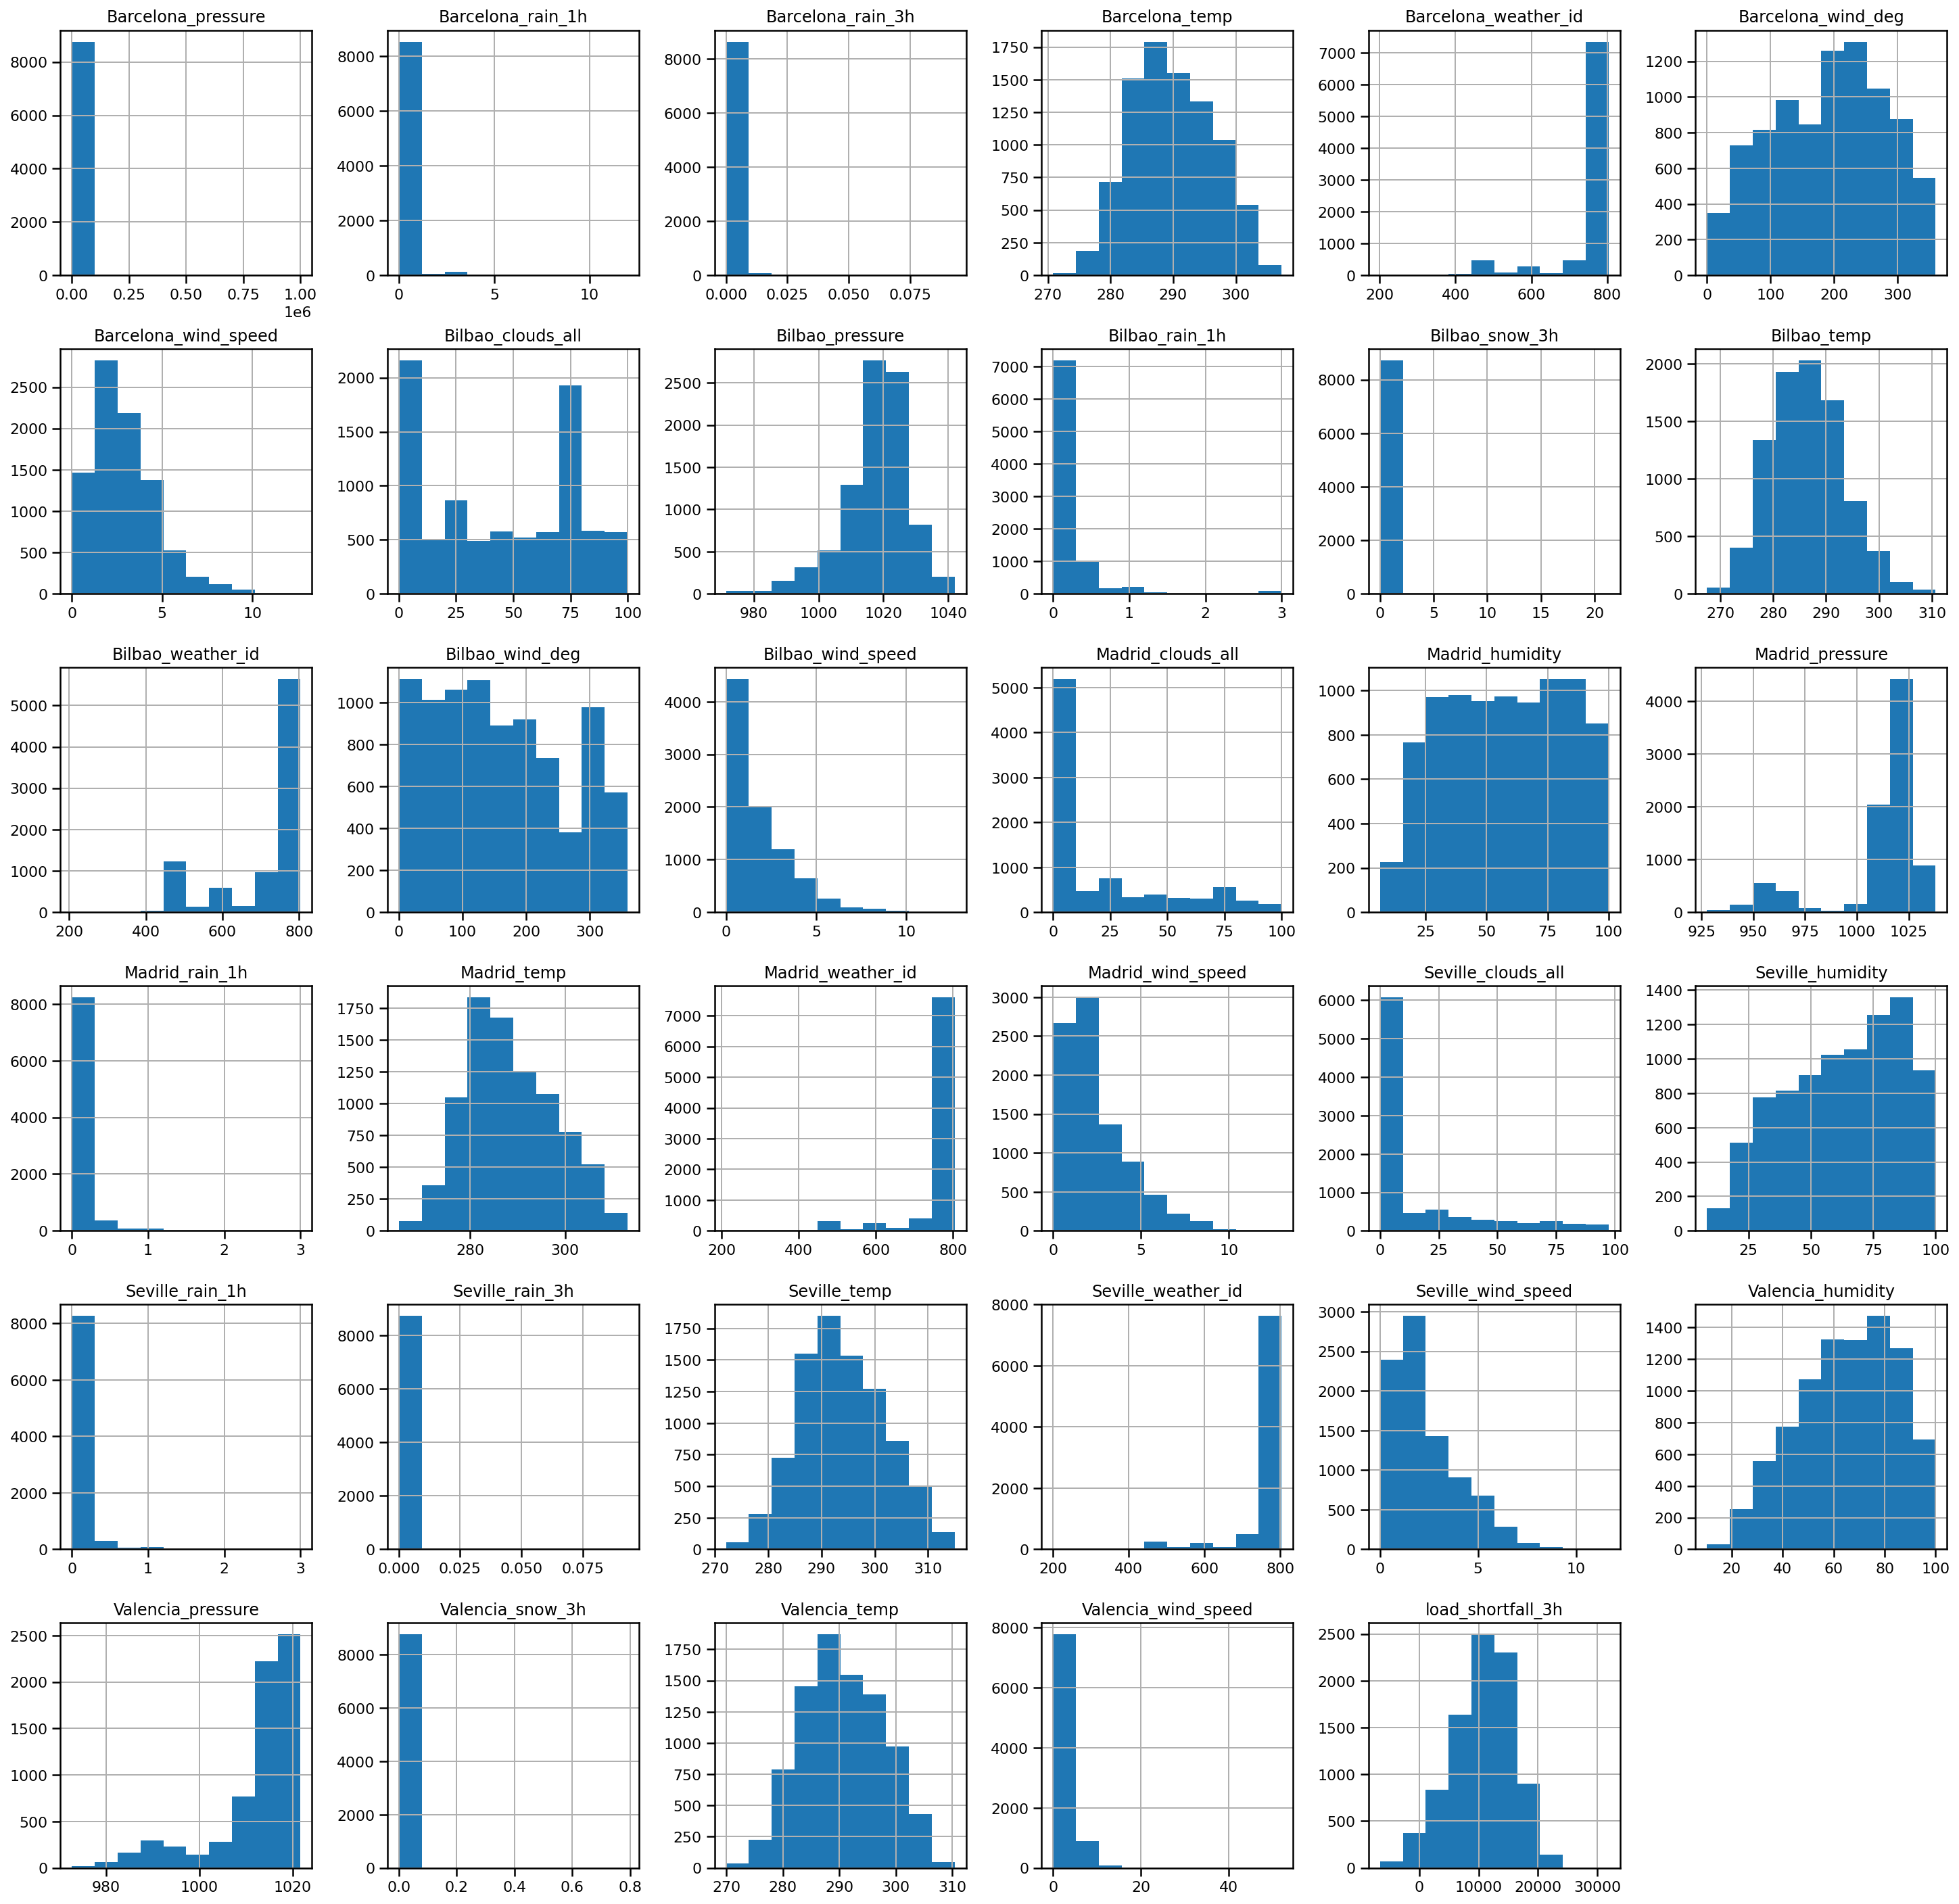

In [12]:
features = ['Barcelona_pressure',
        'Barcelona_rain_1h',
        'Barcelona_rain_3h',
        'Barcelona_temp',
        'Barcelona_weather_id',
        'Barcelona_wind_deg',
        'Barcelona_wind_speed',
        'Bilbao_clouds_all',
        'Bilbao_pressure',
        'Bilbao_rain_1h',
        'Bilbao_snow_3h',
        'Bilbao_temp',
        'Bilbao_weather_id',
        'Bilbao_wind_deg',
        'Bilbao_wind_speed',
        'Madrid_clouds_all',
        'Madrid_humidity',
        'Madrid_pressure',
        'Madrid_rain_1h',
        'Madrid_temp',
        'Madrid_weather_id',
        'Madrid_wind_speed',
        'Seville_clouds_all',
        'Seville_humidity',
        'Seville_rain_1h',
        'Seville_rain_3h',
        'Seville_temp',
        'Seville_weather_id',
        'Seville_wind_speed',
        'Valencia_humidity',
        'Valencia_pressure',
        'Valencia_snow_3h',
        'Valencia_temp',
        
        'Valencia_wind_speed',
        'load_shortfall_3h'] # create a list of all numerical features

df[features].hist(figsize=(25,25));
#plt.title('Distribution of data')

From the group of histograms above shows the distribution of individual features.

We can see that `Madrid_wind_speed`, `Bilbao_rain_1h`, `Valencia_wind_speed`, `Bilbao_wind_speed`, `Seville_clouds_all`, `Barcelona_wind_speed`, `Madrid_clouds_all`, `Seville_wind_speed`, `Barcelona_rain_1h`, `Seville_rain_1h`, `Bilbao_snow_3h`, `Barcelona_pressure`, `Seville_rain_3h`, `Madrid_rain_1h`, `Barcelona_rain_3h`, `Valencia_snow_3h` are highly positive skewed, that is left tailed

And `Madrid_weather_id`, `Barcelona_weather_id`, `Seville_weather_id`, `Valencia_pressure`, `Madrid_pressure`, `Bilbao_weather_id` are highly negatively skewed. that is right tailed.

It is also noted that these features are also identified as outliers.

`Seville_humidity`, `Madrid_humidity`, `Bilbao_clouds_all`, `Bilbao_wind_deg`, `Barcelona_wind_deg`, `Seville_temp_max`, `Valencia_temp_max`, `Valencia_temp`, `Seville_temp`, `Valencia_humidity`, `Valencia_temp_min`, `Barcelona_temp_max`, `Madrid_temp_max`, `Barcelona_temp`, `Bilbao_temp_min`, `Bilbao_temp`,  `Barcelona_temp_min`, `Bilbao_temp_max`, `Seville_temp_min`, `Madrid_temp`, `Madrid_temp_min`, `load_shortfall_3h` are fairly symmetrical.

`Bilbao_pressure` is highly negatively skewed.



**Box Plots**

Box Plots will be used to show the outliers in the data as indicated by the coefficient of kurtosis.


---

<a id="threefour"></a>

### Multivariate Non-Graphical
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

---

Correlation is to check the degree of linearity between the features in data. The Pearson correlation measures the linear relationship between features and assumes that the features are normally distributed.


|   Pearson Correlation Coefficient (r)  |       Description of Relationship     |
|:-------------------|:---------------:|
|  r = -1              |Perfect Negative Correlation |
| -1 < r < -0.8 | Strong Negative Correlation  | 
| - 0.8 < r < -0.5             | Moderate Negative Correlation  | 
|       - 0.5 < r < 0     |Weak Negative Correlation  | 
|       r = 0  |No Linear Correlation | 
| 0 < r < 0.5 | Weak Positive Correlation  | 
| 0.5 < r < 0.8             | Moderate Positive Correlation  | 
|       0.8 < r < 1     |Strong Positive Correlation  | 
|       r = 1  |Perfect Positive Correlation | 


<div align="left" style="width: 800px; text-align: left;">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/pearson_corr.jpg?raw=True"
     alt="Pearson Correlation"
     style="padding-bottom=0.5em"
     width=800px/>
</div>

For a more detailed explanation of correlations, read <a href="https://medium.com/fintechexplained/did-you-know-the-importance-of-finding-correlations-in-data-science-1fa3943debc2#:~:text=Correlation%20is%20a%20statistical%20measure,to%20forecast%20our%20target%20variable.&text=It%20means%20that%20when%20the,variable(s)%20also%20increases.">here</a>.


In [13]:
df.corr()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
Madrid_wind_speed              1.000000        0.259719             0.513092   
Bilbao_rain_1h                 0.259719        1.000000             0.265864   
Valencia_wind_speed            0.513092        0.265864             1.000000   
Seville_humidity              -0.117892        0.069878            -0.075227   
Madrid_humidity               -0.137092        0.106765            -0.019388   
Bilbao_clouds_all              0.244001        0.370733             0.210524   
Bilbao_wind_speed              0.377854        0.085398             0.386478   
Seville_clouds_all             0.191251        0.081131             0.163675   
Bilbao_wind_deg                0.270950        0.279350             0.248643   
Barcelona_wind_speed           0.294640        0.069997             0.347966   
Barcelona_wind_deg            -0.095380       -0.030723            -0.066071   
Madrid_clouds_all              0.230126        0.135524             0.221887   
Seville_wind_speed             0.434104        0.140101             0.316035   
Barcelona_rain_1h              0.062758        0.052558             0.031804   
Seville_rain_1h                0.108413        0.092984             0.046085   
Bilbao_snow_3h                 0.071183        0.096730             0.115133   
Barcelona_pressure             0.011134        0.052458             0.050282   
Seville_rain_3h                0.004795        0.016392             0.027637   
Madrid_rain_1h                 0.150446        0.187423             0.093865   
Barcelona_rain_3h             -0.014644       -0.001412            -0.037553   
Valencia_snow_3h               0.021660        0.008269             0.058629   
Madrid_weather_id             -0.169358       -0.147768            -0.099056   
Barcelona_weather_id          -0.099582       -0.120618            -0.037605   
Bilbao_pressure               -0.231747       -0.054814            -0.096374   
Seville_weather_id            -0.120014       -0.095723            -0.069092   
Valencia_pressure             -0.157088       -0.206765            -0.041408   
Seville_temp_max               0.050043       -0.210323            -0.024045   
Madrid_pressure               -0.136672       -0.298587            -0.158475   
Valencia_temp_max              0.133468       -0.135198             0.065815   
Valencia_temp                  0.128726       -0.127953             0.072366   
Bilbao_weather_id             -0.238128       -0.604616            -0.201379   
Seville_temp                   0.090861       -0.170009            -0.008508   
Valencia_humidity             -0.285787       -0.103868            -0.413017   
Valencia_temp_min              0.119657       -0.116835             0.075533   
Barcelona_temp_max             0.061854       -0.157326            -0.040998   
Madrid_temp_max                0.091464       -0.148397            -0.021970   
Barcelona_temp                 0.080133       -0.138901            -0.021456   
Bilbao_temp_min                0.077330       -0.141269            -0.010166   
Bilbao_temp                    0.060467       -0.182494            -0.022676   
Barcelona_temp_min             0.089992       -0.106593             0.001413   
Bilbao_temp_max                0.042114       -0.219871            -0.033271   
Seville_temp_min               0.110278       -0.120575             0.003618   
Madrid_temp                    0.109572       -0.135927            -0.011982   
Madrid_temp_min                0.098138       -0.116431            -0.019742   
load_shortfall_3h             -0.150981       -0.152510            -0.142791   

                      Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
Madrid_wind_speed            -0.117892        -0.137092           0.244001   
Bilbao_rain_1h                0.069878         0.106765           0.370733   
Valencia_wind_speed          -0.075227        -0.019388           0.210524   
Seville_humidity             

Using the chart above we can determine the degree of linearity in our features.

### Multivariate Graphical Analysis 

**Scatter Plot**

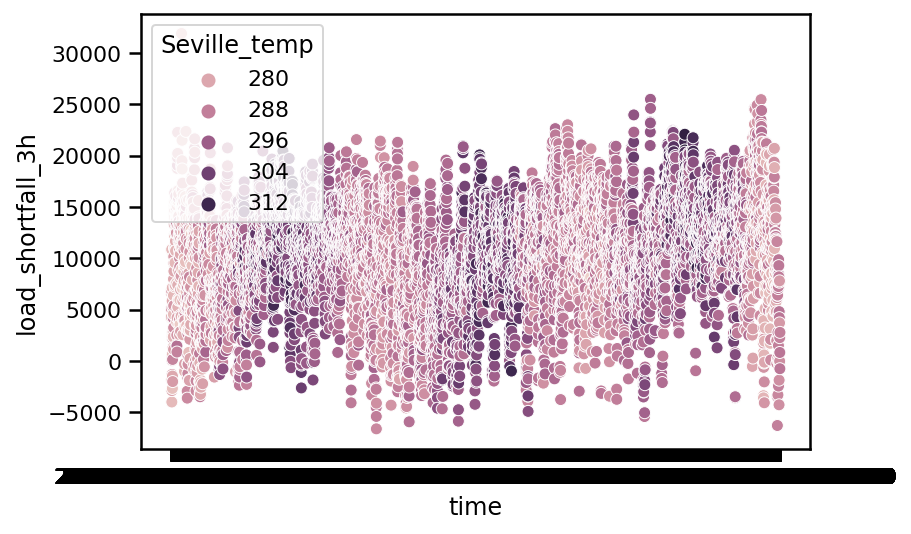

In [14]:
sns.scatterplot(x='time',y='load_shortfall_3h',hue='Seville_temp', data=df);

**An overview of our target variable with time**

In [15]:
#Ploting time against Load_shortfall_3h to see relationship
fig = px.line(df, y = df['load_shortfall_3h'], x =df['time'], width =900, height=400 )
fig.show()

We can'tm te from the image the seasonality in the time axis on their load_shortfall_3h values, We will need to desample (break them into bits) this image to get a better understanding of the graph

To do this we will have to desample the time into:

- Year
- Months
- Weeks
- Days
- Hours

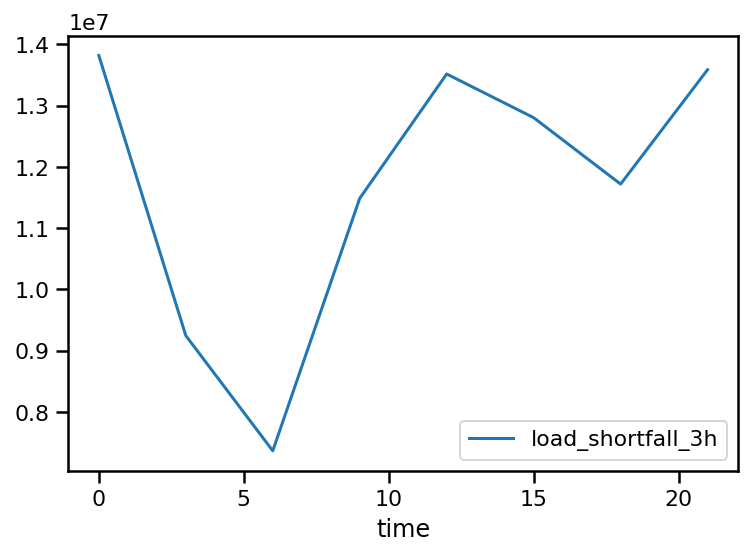

In [16]:
df.groupby([df['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].sum().plot(legend = True);

We can tell that the load Shortfall is peak at the early hours of the day, reduces till it reaches its trough at early morning  then increase again till the hours of Noon, then reduces till  the early nights before going to the peak again.

In [17]:
px.line(df.groupby([df['time'].astype('datetime64').dt.year])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by Year',
        y='load_shortfall_3h',width =800, height=400 )


The yearly Load_short_fall plots indicates an increase in load short fall from 2016 down to 2017 surpassing the previous years

In [18]:
px.line(df.groupby([df['time'].astype('datetime64').dt.month])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by Month of Year',
        y='load_shortfall_3h', width =800, height=400)

Also the plot above, indicates a higher `load short fall` from middle of June down to December

In [19]:
px.line(df.groupby([df['time'].astype('datetime64').dt.weekofyear])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Week of the Year', y='load_shortfall_3h', width =700, height=400)

No much information can be deduced from the the week of the year Load_short_fall as shown above

In [20]:
px.line(df.groupby([df['time'].astype('datetime64').dt.dayofyear])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Day of the Year', y='load_shortfall_3h', width =700, height=400)

The minimum load_short_fall_3h recorded is 1,862 while the maximum is 17,306 as seen from the Day of the year plots

In [21]:
px.line(df.groupby([df['time'].astype('datetime64').dt.day])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Day of the Month', y='load_shortfall_3h', width =800, height=400 )

The plots above shows 10,00 to 12,000 consistent recorded values from middle of each to the end of the month

In [22]:
px.line(df.groupby([df['time'].astype('datetime64').dt.dayofweek])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Day of the Week', y='load_shortfall_3h', width =800, height=400 )

There seems to be a decrease in the Load_short_fall_3h Day of the week plots on Fridays and Saturdays, we can not account for the reasons

In [23]:
px.line(df.groupby([df['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Hour of Day', y='load_shortfall_3h', width =800, height=400 )

There seems to be an increase in the Load_short_fall_3h hourly plots each day, mostly from 10hours and above

**Heatmap Correlation**

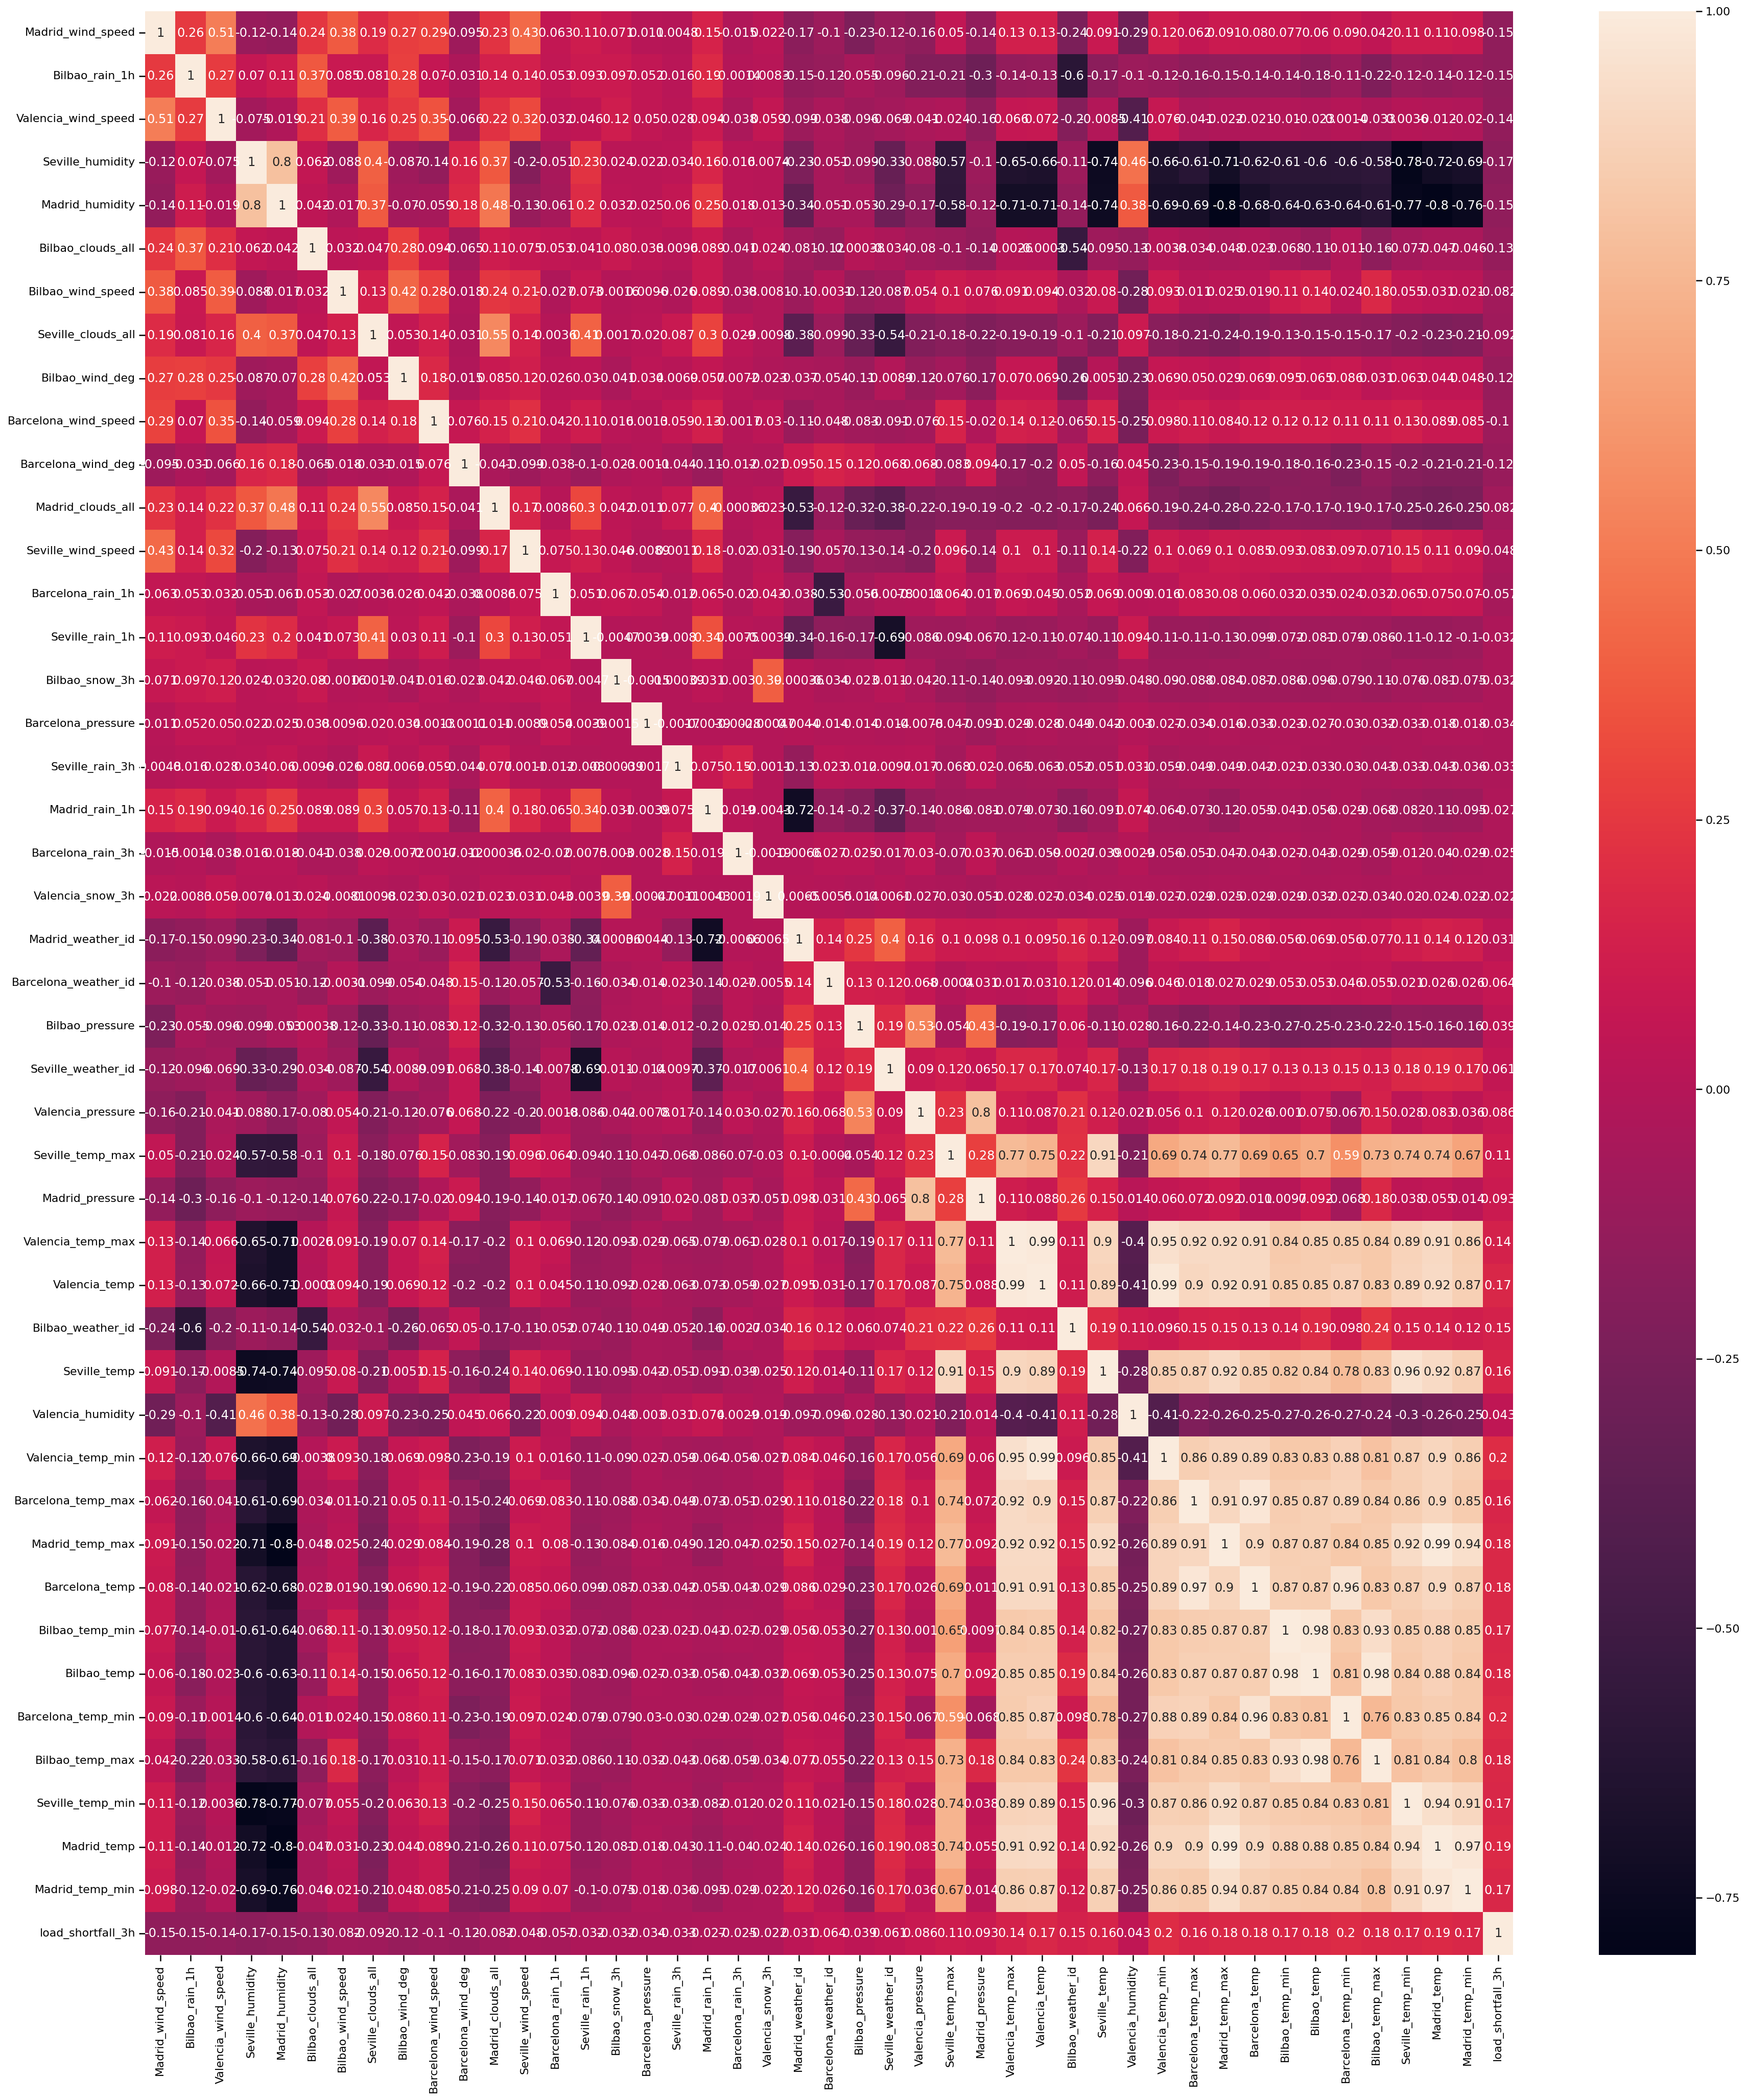

In [24]:
# evaluate correlation
plt.figure(figsize= (30,35))
sns.heatmap(df.corr(), annot=True);

- First, we can easily tell the presence of high correlation (in red) between features on the heatmap at the bottom right corner of our graph
- A breakdown of handling such occurence will be discussed in the feature engineering section of the notebook
- It is important to consider this step when choosing the best features which in turn would result to an improvement of our model.

In [25]:
#Engineering New Features ( i.e Desampling the Time) that will help us in our modeling

"""
We had to convert the time type from an object to a datetime format using the 'astype' method before desampling

"""
df['Year']  = df['time'].astype('datetime64').dt.year
df['Month_of_year']  = df['time'].astype('datetime64').dt.month
df['Week_of_year'] = df['time'].astype('datetime64').dt.weekofyear
df['Day_of_year']  = df['time'].astype('datetime64').dt.dayofyear
df['Day_of_month']  = df['time'].astype('datetime64').dt.day
df['Day_of_week'] = df['time'].astype('datetime64').dt.dayofweek
df['Hour_of_week'] = ((df['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df['time'].astype('datetime64').dt.hour)
df['Hour_of_day']  = df['time'].astype('datetime64').dt.hour

# Test Data
df_test['Year']  = df_test['time'].astype('datetime64').dt.year
df_test['Month_of_year']  = df_test['time'].astype('datetime64').dt.month
df_test['Week_of_year'] = df_test['time'].astype('datetime64').dt.weekofyear
df_test['Day_of_year']  = df_test['time'].astype('datetime64').dt.dayofyear
df_test['Day_of_month']  = df_test['time'].astype('datetime64').dt.day
df_test['Day_of_week'] = df_test['time'].astype('datetime64').dt.dayofweek
df_test['Hour_of_week'] = ((df_test['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_test['time'].astype('datetime64').dt.hour)
df_test['Hour_of_day']  = df_test['time'].astype('datetime64').dt.hour

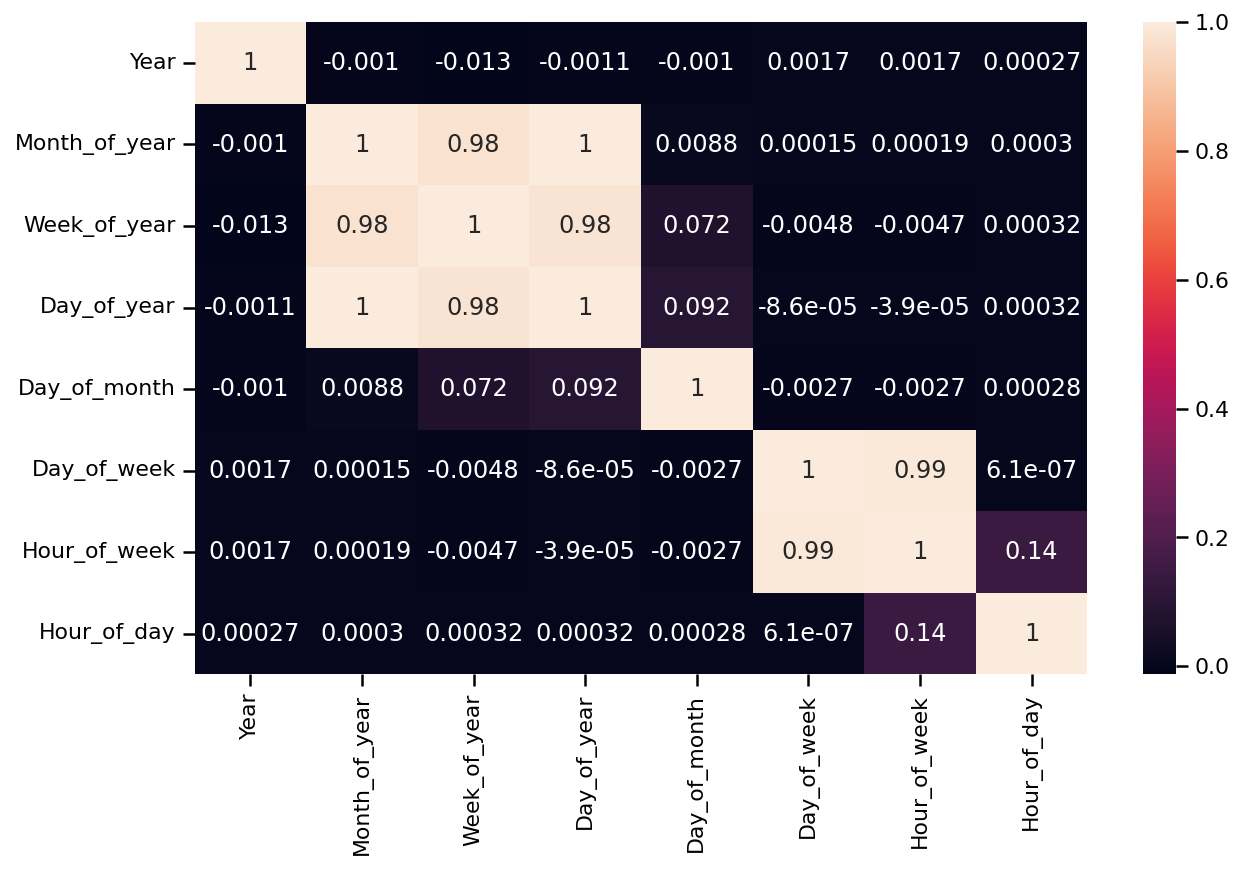

In [26]:
# Checking for multicolinearity between the new features
Time_df = df.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True );

In [27]:
# evaluate correlation

In [28]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<div class="alert alert-block alert-info">
<b>Note:</b> We will be doing the data engineering for the training data as well as the test data Concurrently.
</div>

We will be carrying out Feature Engineering in this section of the notebook.

We have highlighted some key points to consider 

- Why should we use Feature Engineering in data science?
- Feature Selection/Importance
- Handling missing values
- Handling outliers
- Feature Scaling

We will now do the following:

- Connvert both Seville_pressure and Valencia_wind_degree columns from categorical to numerical values.
- Also, we will be converting or downsampling the Time column to various date/time format viz;

    - Year
    - Month of the Year
    - Week of the Year
    - Day of the Year
    - Day of the Month
    - Day of the Week
    - Hour of the Week
    - Hour of the Day
- This will enable us have a better and larger expression of our data during modeling

In [29]:
# remove missing values/ features
# fill the missing value in Valencia_pressure with the mean, which is 1012.

#Train Data
df.fillna(df.Valencia_pressure.mean(), inplace= True)

#Test data
df_test.fillna(df_test.Valencia_pressure.mean(), inplace= True)

In [30]:
# Connvert both Seville_pressure to numerical columns by scrapping off the 'sp' infrom of it

df.Seville_pressure = df.Seville_pressure.str[2:]

# Test data
df_test.Seville_pressure = df_test.Seville_pressure.str[2:]

In [31]:
# Convert to data type int
df['Seville_pressure'] = df['Seville_pressure'].astype(int)

# Test Data
df_test['Seville_pressure'] = df_test['Seville_pressure'].astype(int)

In [32]:
# Connvert both Valencia_wind_deg to numerical columns by scrapping off the 'level_' infrom of it

df.Valencia_wind_deg = df.Valencia_wind_deg.str[6:]

#Test data
df_test.Valencia_wind_deg = df.Valencia_wind_deg.str[6:]

In [33]:
# Convert to data type int
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype(int)

#Test data
df_test['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype(int)

**Engineering New Features ( i.e Desampling the Time) that will help us in our modeling**


In [34]:
#Engineering New Features ( i.e Desampling the Time) that will help us in our modeling

"""
We had to convert the time type from an object to a datetime format using the 'astype' method before desampling

"""
df['Year']  = df['time'].astype('datetime64').dt.year
df['Month_of_year']  = df['time'].astype('datetime64').dt.month
df['Week_of_year'] = df['time'].astype('datetime64').dt.weekofyear
df['Day_of_year']  = df['time'].astype('datetime64').dt.dayofyear
df['Day_of_month']  = df['time'].astype('datetime64').dt.day
df['Day_of_week'] = df['time'].astype('datetime64').dt.dayofweek
df['Hour_of_week'] = ((df['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df['time'].astype('datetime64').dt.hour)
df['Hour_of_day']  = df['time'].astype('datetime64').dt.hour

# Test data

df_test['Year']  = df_test['time'].astype('datetime64').dt.year
df_test['Month_of_year']  = df_test['time'].astype('datetime64').dt.month
df_test['Week_of_year'] = df_test['time'].astype('datetime64').dt.weekofyear
df_test['Day_of_year']  = df_test['time'].astype('datetime64').dt.dayofyear
df_test['Day_of_month']  = df_test['time'].astype('datetime64').dt.day
df_test['Day_of_week'] = df_test['time'].astype('datetime64').dt.dayofweek
df_test['Hour_of_week'] = ((df_test['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_test['time'].astype('datetime64').dt.hour)
df_test['Hour_of_day']  = df_test['time'].astype('datetime64').dt.hour

**Checking for Multicolinearity in our new features**

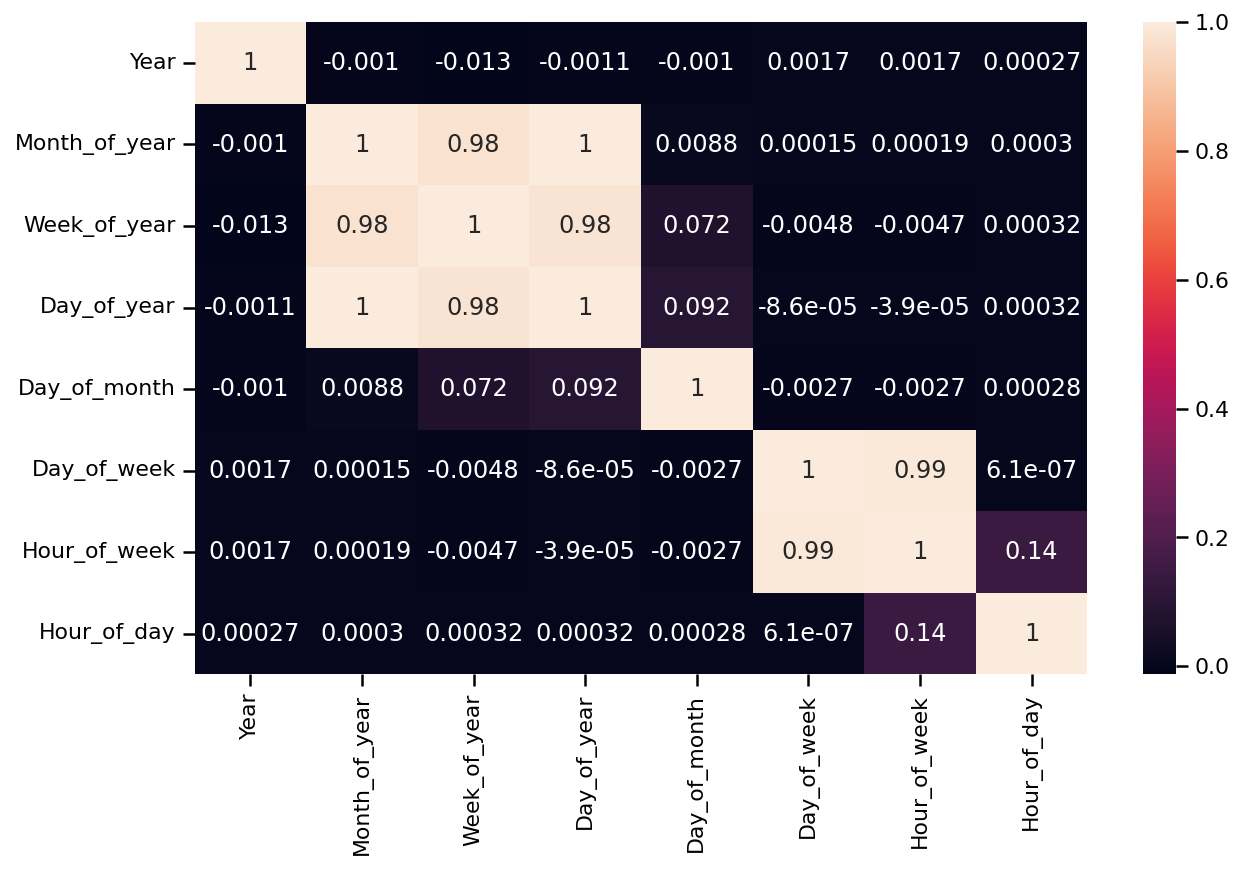

In [35]:
# Plotting the heatmap for the new features
Time_df = df.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True );

Looking at our heatmap tells us that we have high Multicollinearity present in our new features. The features involved are -

- Week of the year
- Day of the year
- Month of the year
- Day of the week
- Hour of the week

We would have to drop either one of the features that have high correlation with each other

---

<a id="threefive"></a>

### Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

---


Feature engineering is the act of extracting features from raw data and transforming them into formats that are suitable for the machine learn‐ ing model. It is a crucial step in the machine learning pipeline, because the right fea‐ tures can ease the difficulty of modeling, and therefore enable the pipeline to output results of higher quality.

from IPython import display
display.Image("Screenshot 2022-11-14 at 11.31.40 AM")


Feature selection is the process where you automatically or manually select the features that contribute the most to your prediction variable or output. Selecting the important independent features which have more relation with the dependent feature will help to build a good model. There are some methods for feature selection:

Feature importance gives you a score for each feature of your data. The higher the score, the more important or relevant that feature is to your target feature.

Feature importance is an inbuilt class that comes with tree-based classifiers such as:

Random Forest Classifiers
Extra Tree Classifiers


Correlation Matrix with Heatmap
Heatmap is a graphical representation of 2D (two-dimensional) data. Each data value represented in a matrix.

First, we'll plot the pair plot between all independent features and dependent features. It will give the relation between dependent and independent features. The relation between the independent feature and the dependent feature is less than 0.2 then choose that independent feature for building a model.

In [36]:
# Assign the time in the test data into a variable before dropping it
# it will be needed when testing our model.
time = df_test['time']

In [37]:
df = df.drop(columns=['Week_of_year','Day_of_year','Hour_of_week','time'])
df_test = df_test.drop(columns=['Week_of_year','Day_of_year','Hour_of_week', 'time'])

Let us check if this approach corresponds with our feature selection.

Using SelectKBest and Chi2 to perform Feature Selection

In [38]:
# Split into independent (X) features and Dependent (y) feature
X = df.drop(columns = 'load_shortfall_3h')
y = df['load_shortfall_3h'].astype('int')

In [39]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(10) #To get the least important feature based on ther score 

Features        Score
22    Valencia_snow_3h  3110.383507
37     Madrid_temp_max  2281.817118
44         Madrid_temp  2106.588763
45     Madrid_temp_min  2054.920443
28    Seville_temp_max  1847.097423
43    Seville_temp_min  1589.866015
33        Seville_temp  1483.057026
30   Valencia_temp_max  1365.685590
36  Barcelona_temp_max  1260.724182
31       Valencia_temp  1229.799250

This result backups our claim, were we saw in the heatmap multicollinearity between features, and from our feature selection, we can see those features as having the lowest significance in our data.

**Dropping Outliers**
We have one more thing to do, which is to remove possible outliers. Also, we will select the important features for our model thus dropping others having multicollinearity

In [40]:
X = X[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]

In [41]:
df_test = df_test[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]

### Feature Scaling
Lastly, before we carry out modeling, it is important to scale our data. As we saw during the EDA, we noticed how some columns(features) had values that were out of range when we compared their mean, max and standard deviation. This can result to bias in the model during decision making, thus it is important to convert all the column values to a certain range/scale.

What is Feature Scaling?
Feature scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In this project, we will be carrying out *Standard Scaling, becasue of it's robustness* to outliers

**Standarizing the data**



In [42]:
# Create standardization object
scaler = StandardScaler()

In [43]:
# Save standardized features into new variable
"""
We used a fit transform method, which first fits in the standardscaler and then transforms the data """
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()


Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0           -0.565065         0.630823              1.932284   
1           -0.565065         0.607959              0.630270   
2           -0.565065         0.542632             -0.485743   
3           -0.565065         0.398912             -0.299741   
4           -0.565065         0.255192              0.816272   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           -1.660205          -0.694188            0.542975   
1           -0.578686          -0.694188            0.542975   
2            1.520733          -0.694188            0.144442   
3            0.925711          -0.694188            0.941509   
4            0.779762          -0.694188            0.343708   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  \
0          -0.203099          1.588087        -0.224278       -0.057269   
1          -0.203099          1.588087        -0.224278       -0.057269   
2          -0.203099          1.588087        -0.224278       -0.057269   
3          -0.203099          1.588087        -0.224278       -0.057269   
4          -0.203099          1.588087        -0.224278       -0.057269   

   Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
0           -0.024277        -0.066278       -0.247776          -0.110037   
1           -0.024206        -0.066278       -0.247776          -0.110037   
2           -0.024158        -0.066278       -0.247776          -0.110037   
3           -0.024229        -0.066278       -0.247776          -0.110037   
4           -0.024372        -0.066278       -0.247776          -0.110037   

   Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0         -0.017312           0.342424              0.385993         1.718219   
1         -0.017312           0.342424              0.385993         1.784583   
2         -0.017312           0.342424              0.385993         1.817765   
3         -0.017312           0.342424              0.385993         1.817765   
4         -0.017312           0.342424              0.385993         1.751401   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Bilbao_weather_id  \
0            0.352274      -1.129531e+00         -2.616796           0.649842   
1            0.352274      -9.289340e-01         -2.539014           0.649842   
2            0.352274      -8.085757e-01         -2.105564           0.649842   
3            0.352274      -3.672620e-01         -1.361703           0.649842   
4            0.352274       1.368315e-14         -1.348214           0.649842   

   Valencia_humidity      Year  Month_of_year  Day_of_month  Day_of_week  \
0           0.540928 -1.226179      -1.602429     -1.675368     -0.00274   
1           0.298645 -1.226179      -1.602429     -1.675368     -0.00274   
2           0.021750 -1.226179      -1.602429     -1.675368     -0.00274   
3          -0.583957 -1.226179      -1.602429     -1.675368     -0.00274   
4          -0.3

In [44]:
# Save standardized the test data features into new variable
"""
We used a fit transform method, which first fits in the standardscaler and then transforms the data """
df_test = scaler.fit_transform(df_test)
df_test = pd.DataFrame(df_test,columns=X.columns)
df_test.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           1.432590          -0.126689       -0.440268             0.995600   
1           1.244747           1.551767       -0.440268             1.162600   
2          -0.070152           1.216076       -0.440268             0.995600   
3           0.117691           0.880385       -0.440268             1.162600   
4           0.869062           0.544694       -0.440268             2.832609   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.964514         0.360022          -0.766227           0.433023   
1          1.061565         0.636255          -1.422372           0.835964   
2          1.061565         1.119662          -1.422372           0.030083   
3          1.271842         0.829617          -0.547512           2.044786   
4         -0.086869         0.056166          -0.547512           5.066840   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0           -0.612116         0.314013              0.911814   
1           -0.612116        -0.197584              1.322013   
2           -0.348454        -0.334010              0.911814   
3           -0.348454         0.348120             -0.113683   
4           -0.612116         0.723291              1.322013   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           -0.026595          -0.824321           -0.926549   
1            1.008344          -0.824321           -1.112918   
2            0.970013          -0.824321           -1.112918   
3           -1.061535          -0.824321           -0.740180   
4            1.199999          -0.824321           -0.926549   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  \
0          -0.291772          2.079927          -0.2387             0.0   
1          -0.291772          2.079927          -0.2387             0.0   
2          -0.291772          2.079927          -0.2387             0.0   
3          -0.291772          2.079927          -0.2387             0.0   
4          -0.291772          2.079927          -0.2387             0.0   

   Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
0            0.287199        -0.018509       -0.309874          -0.025749   
1            0.714535        -0.018509       -0.309874          -0.025749   
2            1.094389        -0.018509       -0.309874          -0.025749   
3            1.474243        -0.018509       -0.309874          -0.025749   
4            1.521725        -0.018509       -0.309874          -0.025749   

   Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0               0.0           0.440333              0.403362         1.021118   
1               0.0           0.440333              0.406764         1.135113   
2               0.0           0.440333              0.403362         0.983120   
3               0.0           0.440333              0.403362         0.945121   
4               0.0           0.440333              0.406764         0.641133   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Bilbao_weather_id  \
0            0.366821                0.0         -0.944893           0.602769   
1            0.366821                0.0         -1.210834          -0.151153   
2            0.371224                0.0         -1.432451           0.593345   
3            0.371224                0.0         -1.388128           0.605911   
4            0.366821                0.0         -0.590304           0.605911   

   Valencia_humidity  Year  Month_of_year  Day_of_month  Day_of_week  \
0          -0.996620   0.0      -1.602745     -1.673503    -1.493348   
1          -0.597040   0.0      -1.602745     -1.673503    -1.493348   
2          -1.232735   0.0      -1.602745     -1.673503    -1.493348   
3          -1.069270   0.0      -1.602745     -1.673503    -1.493348   
4          -1.287223   0.0      -1.

In [45]:
df_test.shape

(2920, 36)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

- We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
- Build a Linear Regression model which would serve as our base model using the train data.
- Try and improve the linear model by employing Lasso and Ridge
- Try out other models like decision trees, Random Forest and SVR

In [46]:
# split data
#Separating our models into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)


What we did here was to split our data into 80% for training and the remaining 20% for testing i.e test_size = 0.2

We made use of the train_test_split syntax from the sklearn library to carry out the splitting

In [47]:
#checking the shape of the training and testing data

print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (7010, 36)
Training target: (7010,)
Testing predictor: (1753, 36)
Testing target: (1753,)


We have been able to allocate 7010 features/observations to the training set of our data.

We have also allocated the remainder i.e 1753 of observations to the testing set of our data.



<div class="alert alert-block alert-info">
<b>Note:</b>  These values are as a result of the splitting ratio carried out, it is important to note that any change in the splitting ration would affect the value and shape of the training and testing sets.
</div>

### Baseline Model

A baseline model is essentially a simple model that acts as a reference in a machine learning project. Its main function is to contextualize the results of trained models.


As our basline, we would first make use of Linear Model.
The term linear model implies that the model is specified as a linear combination of features. Based on training data, the learning process computes one weight for each feature to form a model that can predict or estimate the target value.

**Multiple linear regression model**

In multiple linear regression, our regression equation is:   

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$

where:

- $Y$ is the reponse variable which depends on the $p$ predictor variables;
- $\beta_0$ is the intercept, interpreted as the value of $Y$ when _all_ predictor variables are equal to zero;
- $\beta_j$ is the average effect on $Y$ of a one unit increase in $X_j$, assuming all other predictors are held fixed.

<img src="https://github.com/Explore-AI/Public-Data/raw/master/3D%20regression%20ISLR.jpg" alt="plane" style="width: 450px"/>

**Initialize the model**

In [48]:
lm = LinearRegression()

**Fit the model into training set**

In [49]:
lm.fit(X_train, y_train)

LinearRegression()

**Predict on unseen data**


In [50]:
predict = lm.predict(X_test)
# Predicting on the same training set
train_predict = lm.predict(X_train)

Having fit our model to the provided training data, we can now inspect its coefficients to get a better understanding of their influence on the predictions the model will provide:

In [51]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [52]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [53]:
print("Intercept:", beta_0)

Intercept: 10674.50243114702


In [54]:
beta_js

Coefficient
Madrid_wind_speed     -402.772469
Valencia_wind_deg     -397.471353
Bilbao_rain_1h        -204.515758
Valencia_wind_speed    -56.521863
Seville_humidity      -495.007244
Madrid_humidity       -524.835821
Bilbao_clouds_all     -162.856085
Bilbao_wind_speed     -181.084790
Seville_clouds_all      87.853262
Bilbao_wind_deg       -116.345188
Barcelona_wind_speed  -222.288399
Barcelona_wind_deg    -313.052679
Madrid_clouds_all      190.904667
Seville_wind_speed     -62.757637
Barcelona_rain_1h     -190.007468
Seville_pressure       303.192332
Seville_rain_1h        166.731290
Bilbao_snow_3h          89.528246
Barcelona_pressure     -55.785197
Seville_rain_3h       -128.953826
Madrid_rain_1h          50.307241
Barcelona_rain_3h      -77.299488
Valencia_snow_3h       -71.656340
Madrid_weather_id     -157.201629
Barcelona_weather_id   114.841534
Bilbao_pressure          6.344727
Seville_weather_id      52.470763
Valencia_pressure       70.505229
Seville_temp_max      -102.306862
Bilbao_weather_id       22.194694
Valencia_humidity      297.183058
Year                   518.815931
Month_of_year          674.816438
Day_of_month           469.206559
Day_of_week           -771.518810
Hour_of_day            535.888649

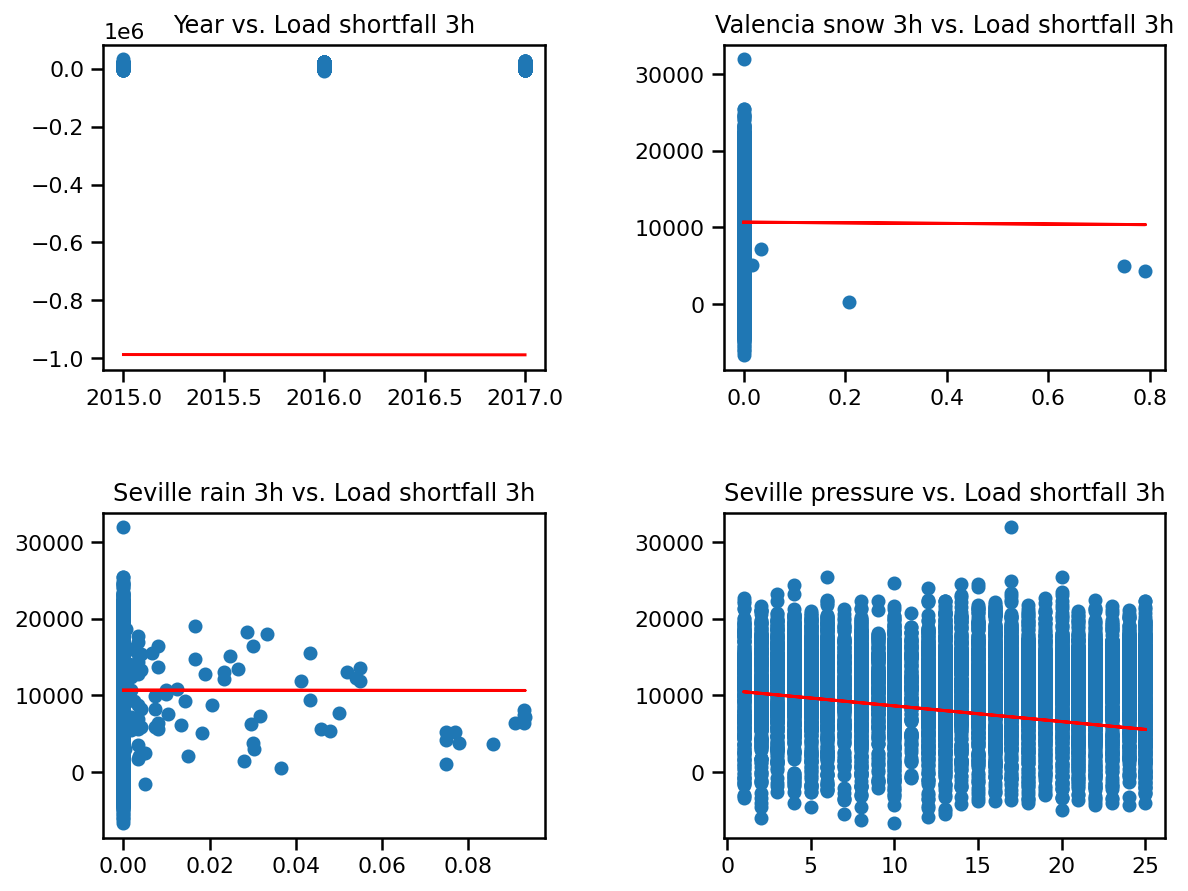

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df['Year'], df['load_shortfall_3h'])
axs[0,0].plot(df['Year'], lm.intercept_ + lm.coef_[4]*df['Year'], color='red')
axs[0,0].title.set_text('Year vs. Load shortfall 3h')

axs[0,1].scatter(df['Valencia_snow_3h'], df['load_shortfall_3h'])
axs[0,1].plot(df['Valencia_snow_3h'], lm.intercept_ + lm.coef_[1]*df['Valencia_snow_3h'], color='red')
axs[0,1].title.set_text('Valencia snow 3h vs. Load shortfall 3h')

axs[1,0].scatter(df['Seville_rain_3h'], df['load_shortfall_3h'])
axs[1,0].plot(df['Seville_rain_3h'], lm.intercept_ + lm.coef_[0]*df['Seville_rain_3h'], color='red')
axs[1,0].title.set_text('Seville rain 3h vs. Load shortfall 3h')

axs[1,1].scatter(df['Seville_pressure'], df['load_shortfall_3h'])
axs[1,1].plot(df['Seville_pressure'], lm.intercept_ + lm.coef_[2]*df['Seville_pressure'], color='red')
axs[1,1].title.set_text('Seville pressure vs. Load shortfall 3h')

fig.tight_layout(pad=3.0)

plt.show()

In [56]:
results_dict = {'Training MSE':
                    {
                    
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }


\begin{align}
RMSE & = \sqrt{MSE} \\
     & = \sqrt{\frac{1}{N}\sum^{N} (\hat{y_i} - y_i)^{2}}
\end{align}

Where $y_i$ are the actual target values for a dataset with $N$ datapoints, and $\hat{y_i}$ represent our corresponding predictions.

For instance, MSE would be measured in units of $mpg^2$, whereas RMSE is measured in the same units as $mpg$.

In [57]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [58]:
results_df

Training MSE      Test MSE    Test RMSE
MLR  2.238783e+07  2.347816e+07  4845.426919

### Lasso regression 

Lasso regression(least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. It is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

The lasso regression allows you to shrink or regularize these coefficients to avoid overfitting and make them work better on different datasets. This type of regression is used when the dataset shows high multicollinearity or when you want to automate variable elimination and feature selection.

$$\min_{\beta} (RSS + \alpha(L2\_norm))$$

A LASSO model is fit under the constraint of minimizing the following equation:

$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^p|b_j|$$

In [59]:
# Create LASSO model object, setting alpha to 0.01
""" when alpha is 0, Lasso regression produces the same coefficients as a linear regression. When alpha is very very large, all coefficients are zero."""
lasso = Lasso(alpha=0.01)
# Train the LASSO model
lasso.fit(X_train, y_train)
# Get predictions
lasso_pred = lasso.predict(X_test)

In [60]:
# Extract intercept from model
intercept = float(lasso.intercept_)

In [61]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [62]:
# Extract intercept
print("Intercept:", float(intercept))

Intercept: 10674.501839319491


In [63]:
coeff

Coefficient
Madrid_wind_speed     -402.768301
Valencia_wind_deg     -397.473834
Bilbao_rain_1h        -204.511082
Valencia_wind_speed    -56.519909
Seville_humidity      -494.984642
Madrid_humidity       -524.794533
Bilbao_clouds_all     -162.852445
Bilbao_wind_speed     -181.077432
Seville_clouds_all      87.822278
Bilbao_wind_deg       -116.341240
Barcelona_wind_speed  -222.286035
Barcelona_wind_deg    -313.048348
Madrid_clouds_all      190.877451
Seville_wind_speed     -62.746669
Barcelona_rain_1h     -189.999478
Seville_pressure       303.177918
Seville_rain_1h        166.700974
Bilbao_snow_3h          89.508810
Barcelona_pressure     -55.778568
Seville_rain_3h       -128.938542
Madrid_rain_1h          50.299713
Barcelona_rain_3h      -77.288312
Valencia_snow_3h       -71.642526
Madrid_weather_id     -157.187051
Barcelona_weather_id   114.833190
Bilbao_pressure          6.333268
Seville_weather_id      52.430706
Valencia_pressure       70.490953
Seville_temp_max      -102.278965
Bilbao_weather_id       22.191982
Valencia_humidity      297.162278
Year                   518.810890
Month_of_year          674.808922
Day_of_month           469.195312
Day_of_week           -771.510300
Hour_of_day            535.882317

### Ridge Regression

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated

![tradeoff](https://raw.githubusercontent.com/Explore-AI/Pictures/master/tradeoff.png)

In [64]:
# Creating Ridge model
Ridge = Ridge()
# Train the model
Ridge.fit(X_train, y_train)
# Get predictions
Ridge_pred = Ridge.predict(X_test)

### Support Vector Regressor
While linear regression models minimize the error between the actual and predicted values through the line of best fit, SVR manages to fit the best line within a threshold of values.

SVR uses the same basic idea as Support Vector Machine (SVM), a classification algorithm, but applies it to predict real values rather than a class.
The aim is to fit as many instances as possible between the lines while limiting the margin violations

In [65]:
# Instantiate support vector regression model
Sv_reg = SVR(kernel='rbf', gamma='auto')
# Train the model
Sv_reg.fit(X_train,y_train)
# Get predictions
SV_pred = Sv_reg.predict(X_test)

### Decision Tree Model

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [66]:
# Instantiate regression tree model
Reg_tree = DecisionTreeRegressor(random_state=42)
# Fitting the model
Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)

### Random Forest
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model

In [67]:
# Our forest consists of 500 trees with a max depth of 40 
RF = RandomForestRegressor(n_estimators=500, max_depth=40)
# Fitting the model
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In this section of our notebook, we will evaluate the performance of SIX MODELS we trained using metrics such as-

- Root Mean Squared Error (RMSE)
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Residual Sum of Squared Error (RSS)

In [68]:
#Comparing the True value and the Predicted Value of our models
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_pred})
Sv_ = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})

**Linear Model**

In [69]:
print(Linear.head())

      Actual     Predicted
1226   11450  12402.636182
7903   13693  12245.041069
1559   18337  11989.975721
3621   -1221   9383.384417
7552    8515  14086.322696


**Lasso Model**

In [70]:
print(Lass_.head()) 

      Actual     Predicted
1226   11450  12402.596545
7903   13693  12245.032510
1559   18337  11989.974822
3621   -1221   9383.406078
7552    8515  14086.234318


**Ridge Model**

In [71]:
print(Ridge_.head())

      Actual     Predicted
1226   11450  12402.251854
7903   13693  12244.719235
1559   18337  11990.023803
3621   -1221   9383.425692
7552    8515  14085.757950


**SVR Model**

In [72]:
print(Sv_.head()) 

      Actual     Predicted
1226   11450  11119.964057
7903   13693  11106.784848
1559   18337  11211.627698
3621   -1221  11021.139113
7552    8515  11220.062862


**Decision Tree Model**

In [73]:
print(Des_.head()) 

      Actual  Predicted
1226   11450     8593.0
7903   13693    11016.0
1559   18337    18497.0
3621   -1221      934.0
7552    8515    10368.0


**Random Forest Model**

In [74]:
print(Rand_.head()) 

      Actual  Predicted
1226   11450   8405.750
7903   13693  12722.828
1559   18337  16293.082
3621   -1221   2091.260
7552    8515  10635.876


From the Predicted values above, we can see some models have values very close to the actual label, let us not get carried away as it doesn't tell the whole story.

Some of these results might be attributed to overfitting and also exposed to a lot of noise/outliers.

We will therefore test our model's performance based on the Metrics aforementioned in the previous cell

In [75]:
Model_RMSE = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_RMSE = pd.DataFrame(data=Model_RMSE)
Model_RMSE

Test RMSE
Decision Tree  3871.701641
Lasso          4845.428409
Linear model   4845.426919
Random Forest  2775.698366
Ridge          4845.426261
SVR            5294.969170

In [76]:
px.bar(Model_RMSE, y =Model_RMSE['Test RMSE'],
       color = Model_RMSE.index, width =700, height=400)

From the graph above, we can confirm that the Random Forest model performs better than others in terms of RMSE

In [77]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

Test MSE
Decision Tree  1.499007e+07
Lasso          2.347818e+07
Linear model   2.347816e+07
Random Forest  7.704501e+06
Ridge          2.347816e+07
SVR            2.803670e+07

In [78]:
px.bar(Model_Performance2, y =Model_Performance2['Test MSE'],
       color = Model_Performance2.index, width =700, height=400)


In [79]:
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict)),
                        "Ridge": (metrics.mean_absolute_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_absolute_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_absolute_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_absolute_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_absolute_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

Test MAE
Decision Tree  2795.033657
Lasso          3858.659602
Linear model   3858.656423
Random Forest  2131.523043
Ridge          3858.663652
SVR            4227.299991

In [80]:
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'],
       color = Model_Performance3.index, width =700, height=400)

In [81]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Ridge": (metrics.r2_score(y_test,Ridge_pred)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_pred)),
                         "SVR" : (metrics.r2_score(y_test,SV_pred)),
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

Test R^2
Decision Tree  0.467724
Lasso          0.166323
Linear model   0.166324
Random Forest  0.726424
Ridge          0.166324
SVR            0.004456

In [82]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
       color = Model_Performance4.index, width =700, height=400)

In [83]:
# Compare model performance

In [84]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [85]:
# discuss chosen methods logic

- Coefficient of determination (R2) measures the amount of variance in the predictions explained by the dataset.
- It is the difference between the samples in the dataset and the predictions made by the model.
- It is measure from zero to one with one representing a perfect model and zero showing that the model will perform badly on unseen data.
- RMSE is the square root of the mean square error (MSE) which represents the average of the squared difference between the true and predicted values.
- It measures the variance of the residuals, while the RMSE measures the standard deviation of the residuals.
- The smaller the RMSE of the model the better.
### Choosen method's logic:
- Initially we started building our model using linear regression.
- However a linear model is not appropriate for data that is not linear, it also suffers from multi-colinearity.
- Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
- Lasso regression helps in reducing overfitting but and in feature selection by setting coefficients with high values to zero.
- Decision trees are not affected by multicolinearity, they support non-linearity and are resistant to outliers further more they require little data preprocessing.
- However Decision trees are prone to overfitting and parameter tuning can led to biased learned trees if some classes dominate.
- Random forests address the problem of overfitting.
- They use ensemble learning methods for regression by constructing several Decision trees during training and outputs the mean of the classes as the prediction of all the trees.

### Conclusion
- As aspiring data scientists we have developed a model that will assist in predicting the 3 hourly load shortfall of power generated by renewable sources in Spain .
- This will assist in informing the Spanish Government of any trends and patterns of the country's renewable resources and fossil fuel energy generation and whether it is viable to expand its' renewable energy resource infrastructure investments.

### References
Markdown for Jupyter notebooks cheatsheet https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet

https://www.heavy.ai/technical-glossary/feature-engineering

https://towardsdatascience.com/beginners-baseline-model-for-machine-learning-project-f835ebd53ee0

Explore AI learning Platform https://athena.explore-datascience.net/student/lesson/content-view/95/254/1951/5

In [86]:
df_test['load_shortfall_3h'] = RF.predict(df_test)

In [87]:
df_test['time'] = time
load = df_test[['time','load_shortfall_3h']]
load.to_csv('sample_submission_load_shortfall2.csv', index = False)
load

time  load_shortfall_3h
0     2018-01-01 00:00:00           8066.828
1     2018-01-01 03:00:00           2537.336
2     2018-01-01 06:00:00           2916.532
3     2018-01-01 09:00:00           5865.164
4     2018-01-01 12:00:00           5962.912
...                   ...                ...
2915  2018-12-31 09:00:00          13816.558
2916  2018-12-31 12:00:00          14992.804
2917  2018-12-31 15:00:00          14859.330
2918  2018-12-31 18:00:00          14844.914
2919  2018-12-31 21:00:00          14897.094

[2920 rows x 2 columns]

In [88]:
import pickle

model_save_path = "new2.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(Ridge,file)

In [89]:
model_save_path = "new2.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(Ridge,file)

In [90]:
model_load_path = "new2.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [91]:
y_pred = unpickled_model.predict(X_test)

In [92]:
y_pred = unpickled_model.predict(X_test)

In [93]:
# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))


MSE: 23478155.652156122
